In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r"test.csv")

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

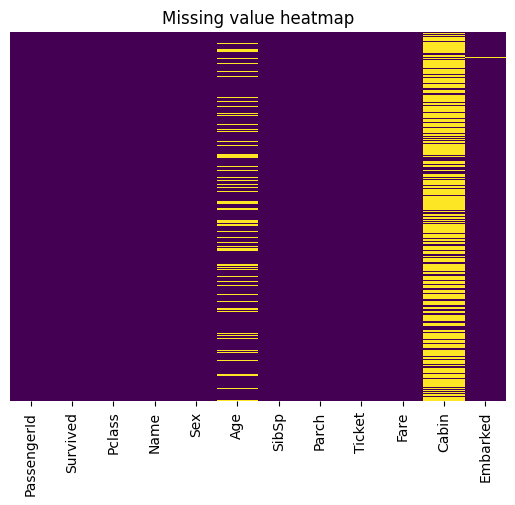

In [7]:
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing value heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

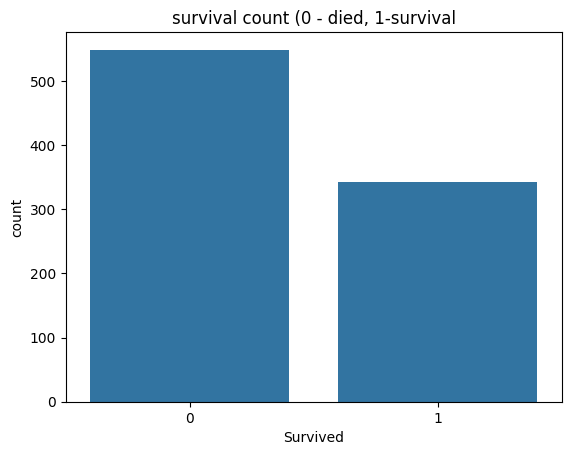

In [8]:
sns.countplot(x = 'Survived', data= train_df) 
plt.title("survival count (0 - died, 1-survival")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

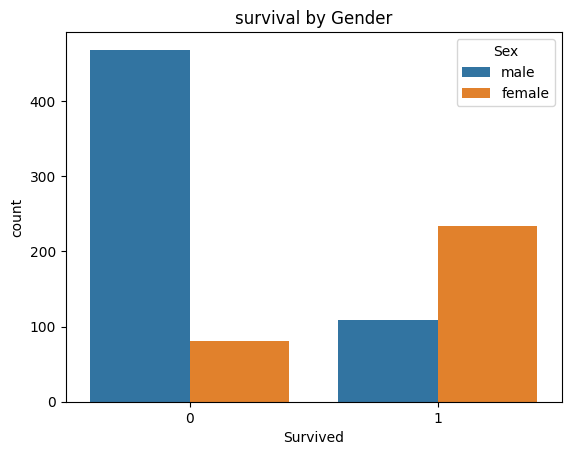

In [9]:
sns.countplot(x = 'Survived', hue = 'Sex', data= train_df) 
plt.title("survival by Gender")
plt.show

In [10]:
train_df = train_df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [13]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True) 
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

/tmp/ipykernel_7458/1177241009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
/tmp/ipykernel_7458/1177241009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [14]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

/tmp/ipykernel_7458/226335249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
/tmp/ipykernel_7458/226335249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

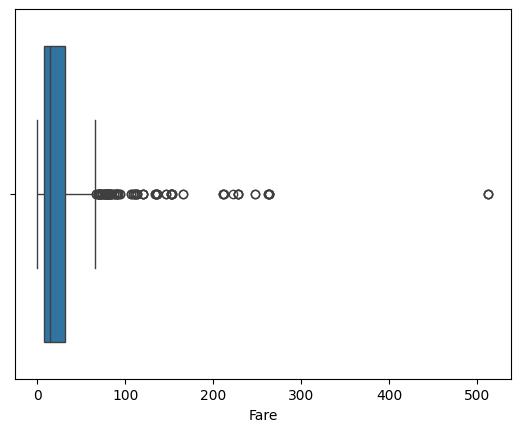

In [15]:
sns.boxplot(x=train_df['Fare'])
plt.show()

In [16]:
outliers_present = ['Fare', 'Age', 'SibSp', 'Parch']

for i in outliers_present:
    q1 = train_df[i].quantile(0.25)
    q3 = train_df[i].quantile(0.75)
    iqr = q3 - q1
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    
    # Filter the DataFrame to keep rows within the IQR range
    train_df = train_df[(train_df[i] >= min_r) & (train_df[i] <= max_r)]

# Verify the changes
print(train_df.head())

   PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.000000      1      0   7.2500   
2            3         1       3  female  26.000000      0      0   7.9250   
3            4         1       1  female  35.000000      1      0  53.1000   
4            5         0       3    male  35.000000      0      0   8.0500   
5            6         0       3    male  29.699118      0      0   8.4583   

  Embarked  
0        S  
2        S  
3        S  
4        S  
5        Q  


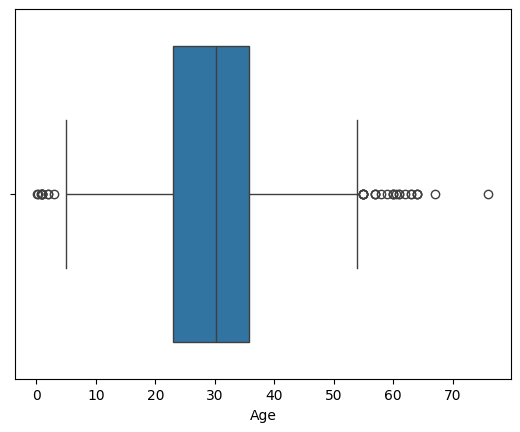

In [17]:
sns.boxplot(x=test_df['Age'])
plt.show()

In [18]:
outliers_present = ['Fare', 'Age', 'SibSp', 'Parch']

for i in outliers_present:
    q1 = test_df[i].quantile(0.25)
    q3 = test_df[i].quantile(0.75)
    iqr = q3 - q1
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    
    # Filter the DataFrame to keep rows within the IQR range
    test_df = test_df[(test_df[i] >= min_r) & (test_df[i] <= max_r)]

# Verify the changes
print(train_df.head())

   PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.000000      1      0   7.2500   
2            3         1       3  female  26.000000      0      0   7.9250   
3            4         1       1  female  35.000000      1      0  53.1000   
4            5         0       3    male  35.000000      0      0   8.0500   
5            6         0       3    male  29.699118      0      0   8.4583   

  Embarked  
0        S  
2        S  
3        S  
4        S  
5        Q  


In [19]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
# Encoding 
train_df['Sex'] = train_df['Sex'].map({'male': 0, "female": 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, "female": 1})

In [21]:
train_df['Embarked'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [22]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_map)
test_df['Embarked'] = test_df['Embarked'].map(embarked_map)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  571 non-null    int64  
 1   Survived     571 non-null    int64  
 2   Pclass       571 non-null    int64  
 3   Sex          571 non-null    int64  
 4   Age          571 non-null    float64
 5   SibSp        571 non-null    int64  
 6   Parch        571 non-null    int64  
 7   Fare         571 non-null    float64
 8   Embarked     571 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 44.6 KB


In [24]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [25]:
train_df['Sex']

0      0
2      1
3      1
4      0
5      0
      ..
884    0
886    0
887    1
889    0
890    0
Name: Sex, Length: 571, dtype: int64

In [26]:
train_df['Embarked']

0      0
2      0
3      0
4      0
5      2
      ..
884    0
886    0
887    0
889    1
890    2
Name: Embarked, Length: 571, dtype: int64

# Feature selection and model training

In [27]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [28]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
x = train_df[features]
y = train_df['Survived']

In [29]:
x, y

(     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0              1       3    0  22.000000      1      0   7.2500         0
 2              3       3    1  26.000000      0      0   7.9250         0
 3              4       1    1  35.000000      1      0  53.1000         0
 4              5       3    0  35.000000      0      0   8.0500         0
 5              6       3    0  29.699118      0      0   8.4583         2
 ..           ...     ...  ...        ...    ...    ...      ...       ...
 884          885       3    0  25.000000      0      0   7.0500         0
 886          887       2    0  27.000000      0      0  13.0000         0
 887          888       1    1  19.000000      0      0  30.0000         0
 889          890       1    0  26.000000      0      0  30.0000         1
 890          891       3    0  32.000000      0      0   7.7500         2
 
 [571 rows x 8 columns],
 0      0
 2      1
 3      1
 4      0
 5      0
       ..
 884    0
 88

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

In [32]:
x_train.shape, y_train.shape

((485, 8), (485,))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [35]:
lr.score(x_train, y_train), lr.score(x_val, y_val)

(0.8020618556701031, 0.813953488372093)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
prd = lr.predict(x_val)
accuracy = accuracy_score(y_val, prd)
accuracy

0.813953488372093

# prediction on test set

In [38]:
x_test = test_df[features]

In [39]:
test_prediction = lr.predict(x_test)

In [40]:
x_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [41]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived':test_prediction
})

In [42]:
submission.to_csv('titanic_submission.csv', index = False)
print('Submission file created successfully.')

Submission file created successfully.


In [43]:
df_submission = pd.read_csv(r"titanic_submission.csv")
df_submission

,PassengerId,Survived
0,892,0
1,895,0
2,897,0
3,898,1
4,900,1
...,...,...
215,1302,1
216,1304,1
217,1305,0
218,1307,0
